# Features

### 'match_id', 'venue', 'innings', 'batting_team', 'bowling_team', 'total_runs'

In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.svm import SVR
import keras
import keras.backend as kb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import r2_score

In [91]:
df = pd.read_csv('../dataset/all_matches_clean.csv', header=0)

In [92]:
relevant_cols = ['match_id','venue', 'innings', 'ball', 'batting_team', 'bowling_team', 
                 'striker', 'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides',
                 'noballs', 'byes', 'legbyes', 'penalty']

df = df.loc[:, relevant_cols]

In [93]:
df['target'] = df['runs_off_bat'] + df['extras']

In [94]:
df = df.drop(['runs_off_bat', 'extras'], axis=1)

In [95]:
df = df[df['ball'] < 6]

In [96]:
df = df[df['innings'] < 3]

In [97]:
df = df.groupby(['match_id', 'venue', 'innings',
       'batting_team', 'bowling_team']).target.sum()

In [98]:
df = df.reset_index()

In [99]:
df = df.drop(columns=['match_id'])

In [100]:
# Data has been cleaned
venue_encoder = LabelEncoder()
team_encoder = LabelEncoder()

In [101]:
df['venue'] = venue_encoder.fit_transform(df['venue'])
df['batting_team'] = team_encoder.fit_transform(df['batting_team'])
df['bowling_team'] = team_encoder.fit_transform(df['bowling_team'])

In [102]:
df

,venue,innings,batting_team,bowling_team,target
0,15,1,6,10,61
1,15,2,10,6,26
2,22,1,0,4,53
3,22,2,4,0,63
4,9,1,8,2,40
...,...,...,...,...,...
1631,16,2,10,7,46
1632,34,1,0,2,33
1633,34,2,2,0,65
1634,16,1,6,11,50


In [103]:
df_dummies = pd.get_dummies(df, prefix=['v','in','bt','bo'], 
                            columns = ['venue', 'innings', 'batting_team', 'bowling_team'], drop_first=True)

In [106]:
df_dummies.to_csv('./dt/feature_engg_1.csv', index=False)

In [105]:
df_dummies.shape

(1636, 58)

In [5]:
%run all_models.ipynb

Data has shape  (1636, 58)
y_shape is  (1636,)
x_shape is  (1636, 57)

R2 score : LinearRegression = -0.03277646281375102
RMSE     : LinearRegression = 11.408872999761636

R2 score : BayesianRidge = -0.006132854694210099
RMSE     : BayesianRidge = 11.260748145933

R2 score : DecisionTreeRegressor = -0.6225672047323063
RMSE     : DecisionTreeRegressor = 14.300160990448447

R2 score : RandomForestRegressor = -0.3598759514791801
RMSE     : RandomForestRegressor = 13.091494471956816

R2 score : SVR = 0.0006441404576549292
RMSE     : SVR = 11.222759635417374
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./ipl_model_tf/assets

R2 score : Neural Network = -1.53198357662645
RMSE     : Neural Network = 14.546165899197511


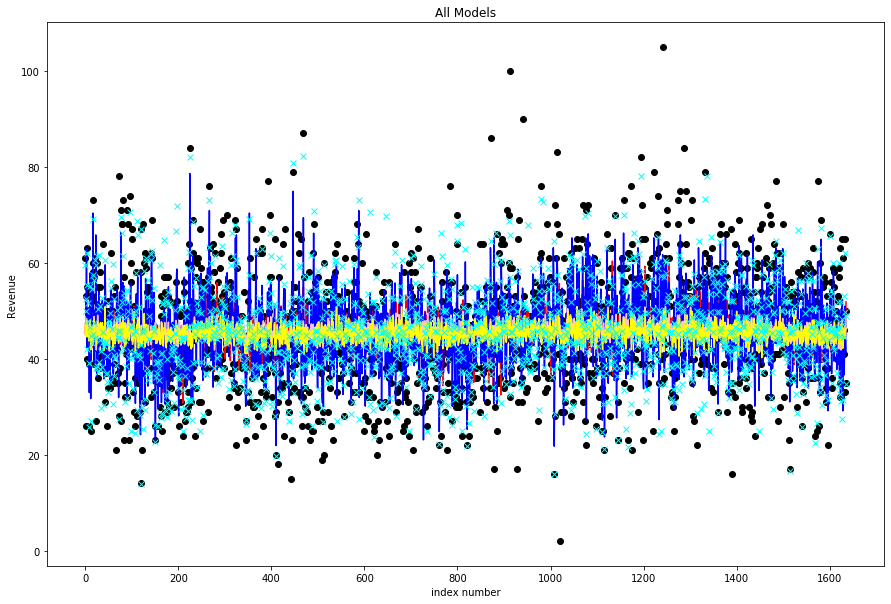

In [6]:
do_traning(filename = './dt/feature_engg_1.csv')